<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
import ssl

Загрузить датасет по url:


In [134]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Контекст

The World Happiness Report - это обзор о счастье в мире, в котором 156 стран оцениваются по тому, насколько счастливыми их граждане считают себя. В «Докладе о мировом счастье» этого года основное внимание уделяется счастью и сообществу: как счастье развивалось за последние десять лет, с акцентом на технологии, социальные нормы, конфликты и политику правительства, которые привели к этим изменениям.


*  **Country (region)** - Название страны.
*  **Ladder** - Cantril Ladder - показатель удовлетворенности жизнью.
*  **SD of Ladder** - Стандартное отклонение.
*  **Positive affect** - Мера положительных эмоций.
*  **Negative affect** - Мера отрицательной эмоции.
*  **Social support** - Степень вклада социальной поддержки в расчет показателя счастья.
*  **Freedom** - Степень, в которой свобода способствовала расчету показателя счастья.
*  **Corruption** - В какой степени восприятие коррупции влияет на показатель счастья.
*  **Generosity** - Степень вклада Щедрости в расчет показателя счастья.
*  **Log of GDP per capita** - Степень вклада ВВП в расчет показателя счастья.
*  **Healthy life expectancy** - Степень влияния ожидаемой продолжительности жизни на расчет показателя счастья.

Посмотреть первые несколько рядов таблицы

In [135]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

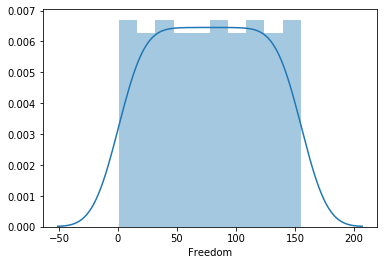

In [143]:
sns.distplot(df['Freedom'], 10)

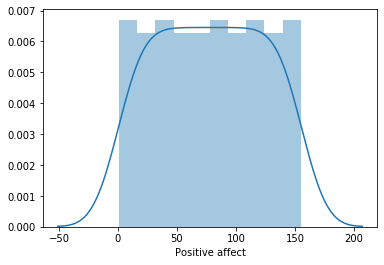

In [153]:
sns.distplot(df['Positive affect'], 10)

*Как можно увидеть из графиков - в том и другом случае у нас похоже на* **равномерное распределение**

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Медиана:  71.0
Математическое ожидание:  0.9935897435897436
Стандартное отклонение:  0.07980704870505598
Дисперсия:  0.006369165023011178
Минимум:  1.0  Максимум:  155.0
Размах:  154.0


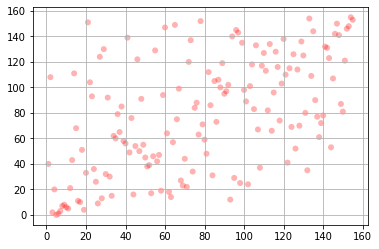

In [138]:
Freedom = df['Freedom'].notnull() # Уберем пустые значения
Positive = df['Positive affect'].notnull()

print('Медиана: ', statistics.median(df['Freedom']))
#print('Значение моды: ', statistics.mode(df['Freedom']))

# Моду нельзя найти потому, что нет уникальной моды. В колонке Freedom 156 одинаково распространенных значений.
# Исходя из этого мы можем предположить, что все значения имеют одинаковую вероятность

print('Математическое ожидание: ', statistics.mean(Freedom))

print('Стандартное отклонение: ', statistics.pstdev(Freedom))

print('Дисперсия: ', statistics.pvariance(Freedom))

print('Минимум: ', min(df['Freedom']), ' Максимум: ', max(df['Freedom']))

print('Размах: ', max(df['Freedom']) - min(df['Freedom']))

fig, ax = plt.subplots()
ax.scatter(df['Freedom'], df.index, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)

# Как можно увдеть из графика, то определенных выбросов нет. Данные распределены равномерно.

Почему нельзя найти моду?

**Потому, что нет уникальной моды. В колонке Freedom 156 одинаково распространенных значений.**

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Математически коэффициент корреляции Пирсона: 0.9999999999999999


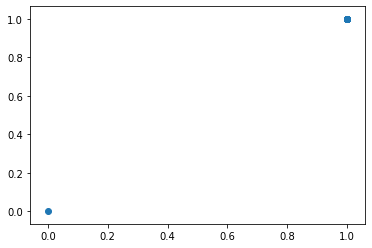

In [147]:
from scipy.stats import pearsonr
plt.scatter(Freedom, Positive)
corr, p_value = pearsonr(Freedom, Positive)
print('Математически коэффициент корреляции Пирсона:', corr)

#Коэффициент практически равен 1, что говорит, что величины линейно зависимы

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [140]:
print("Среднее: ", statistics.mean(Freedom))
free = Freedom - statistics.mean(Freedom)
print("Стандарное отклонение: ", statistics.mean(free))
print("Минимум: ", min(free))
print("Максимум: ", max(free))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
free2 = min_max_scaler.fit_transform(np.array(free).reshape(-1, 1))
print(min(free2))
print(max(free2))

Среднее:  0.9935897435897436
Стандарное отклонение:  -2.2773805633336544e-17
Минимум:  -0.9935897435897436
Максимум:  0.0064102564102563875
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

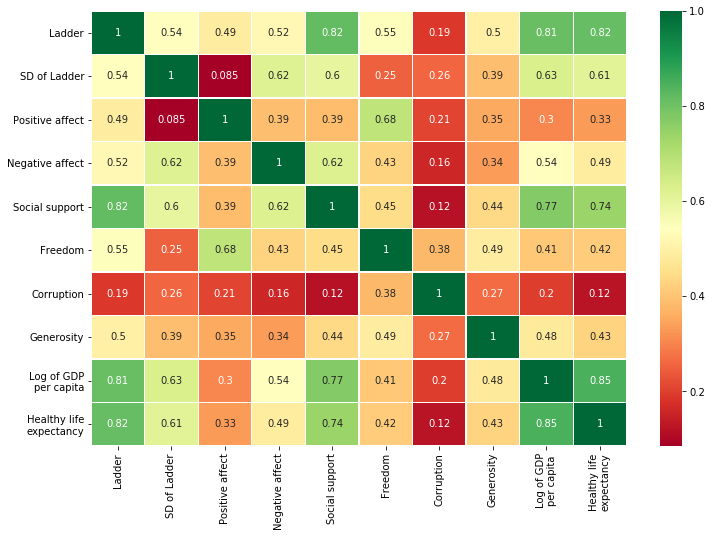

In [156]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Загрузить таблицу цен на авокадо: 

In [161]:
df2=pd.read_csv('avocado.csv')
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

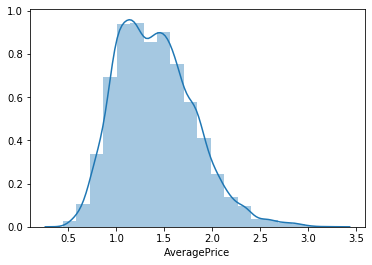

In [162]:
sns.distplot(df2['AveragePrice'], 20)
# Похоже на нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

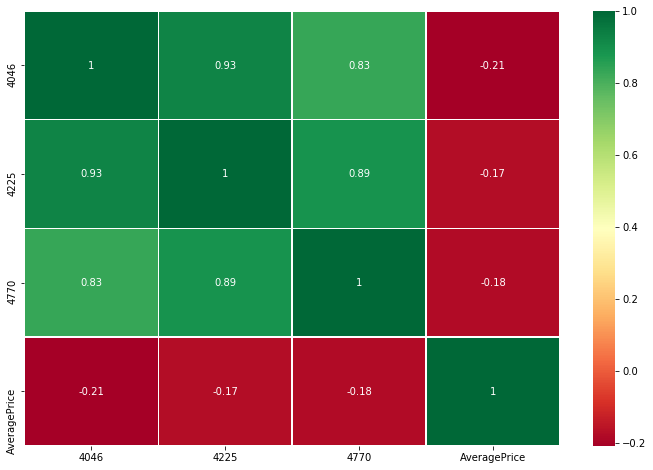

In [168]:
import seaborn as sns
sns.heatmap(df2[['4046','4225','4770','AveragePrice']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
# Как можно увидеть из матрицы корреляции, что средняя цена имеет обратную корреляцию со всеми вариантами
# кол-ва авокадо из чего можно сделать вывод, что чем больше объем покупаемых авокадо, тем меньше на них цена